# Importing Libraries & required parameters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

# Machine leraning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Ignore warning due to version mismatch
import warnings
warnings.filterwarnings('ignore') 

# Data Sourcing and Understanding the dataset

In [2]:
# Loading the dataset in dataframe
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
cars.shape
print("Total Number of Rows :",cars.shape[0])
print("Total Number of Columns :",cars.shape[1])

Total Number of Rows : 205
Total Number of Columns : 26


In [4]:
# datatypes of each column 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Here we can see that there are no null or missing values. 

## Cross verification of non-null values by other methods :-

# Data Cleaning, Manipulation, Visualization & Detecting Outliers

## 1. Data Cleaning :-

In [5]:
# checking missimg values
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Finding the duplicates and dropping them
cars=cars.drop_duplicates()

### Here , We don't have any missing values & duplicate records in the dataset. 

In [7]:
#The attribute car_ID cannot be used price modeling. So,we can drop it.
cars.drop('car_ID',axis=1,inplace=True)

In [8]:
cars.shape
print("Total Number of Rows:",cars.shape[0])
print("Total Number of Columns:",cars.shape[1])

Total Number of Rows: 205
Total Number of Columns: 25


### Statistics of the dataset 

In [9]:
# describe all object columns in cars dataframe 
cars.describe(include = "object")

CarName fueltype aspiration doornumber carbody drivewheel  \
count             205      205        205        205     205        205   
unique            147        2          2          2       5          3   
top     toyota corona      gas        std       four   sedan        fwd   
freq                6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94

In [10]:
# describe all numeric columns in cars dataframe 
cars.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

## 2. Data Manipulation :-

#### CarName comprises of 2 parts :-
First word is the name of 'car company'& second is the 'car model'.
 

In [11]:
# Splitting Car Company and its model and taking only car company
cars['car_company'] = cars['CarName'].apply(lambda x: x.split( )[0])
cars.drop('CarName',axis=1,inplace=True)

In [12]:
# Print Unique Car Company Names
cars['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### We see that here some names of the company are written incorrect , so we have to correct them. 

In [13]:
# Renaming the incorrect Car Brands names
cars['car_company'].replace('maxda','mazda',inplace=True)
cars['car_company'].replace('Nissan','nissan',inplace=True)
cars['car_company'].replace('porcshce','porsche',inplace=True)
cars['car_company'].replace('toyouta','toyota',inplace=True)
cars['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [14]:
# Print Unique fuelsystem names
cars['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

We can see 'mfi' fuelsystem doesn't mean anything, its nothing but mpfi which is misspelled incorrectly in dataset

In [15]:
# Renaming the misspelled Fuel Type
cars['fuelsystem'].replace('mfi','mpfi',inplace=True)

In [16]:
# Now list all categorical Variables
categorical_vars = list(cars.columns[cars.dtypes == 'object'])
print("List of Categorical Variables are :", categorical_vars)

print(" ")

# list all continuous Variables
continuous_vars = list(cars.columns[cars.dtypes != 'object'])
print("List of Continuous Variables are :", continuous_vars)

print(" ")

# Shape of the dataset
cars.shape
print("Total Number of Rows:",cars.shape[0])
print("Total Number of Columns:",cars.shape[1])

List of Categorical Variables are : ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_company']
 
List of Continuous Variables are : ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
 
Total Number of Rows: 205
Total Number of Columns: 25


## 3. Data Visualization :-

We'll visualize our data using matplotlib and seaborn.

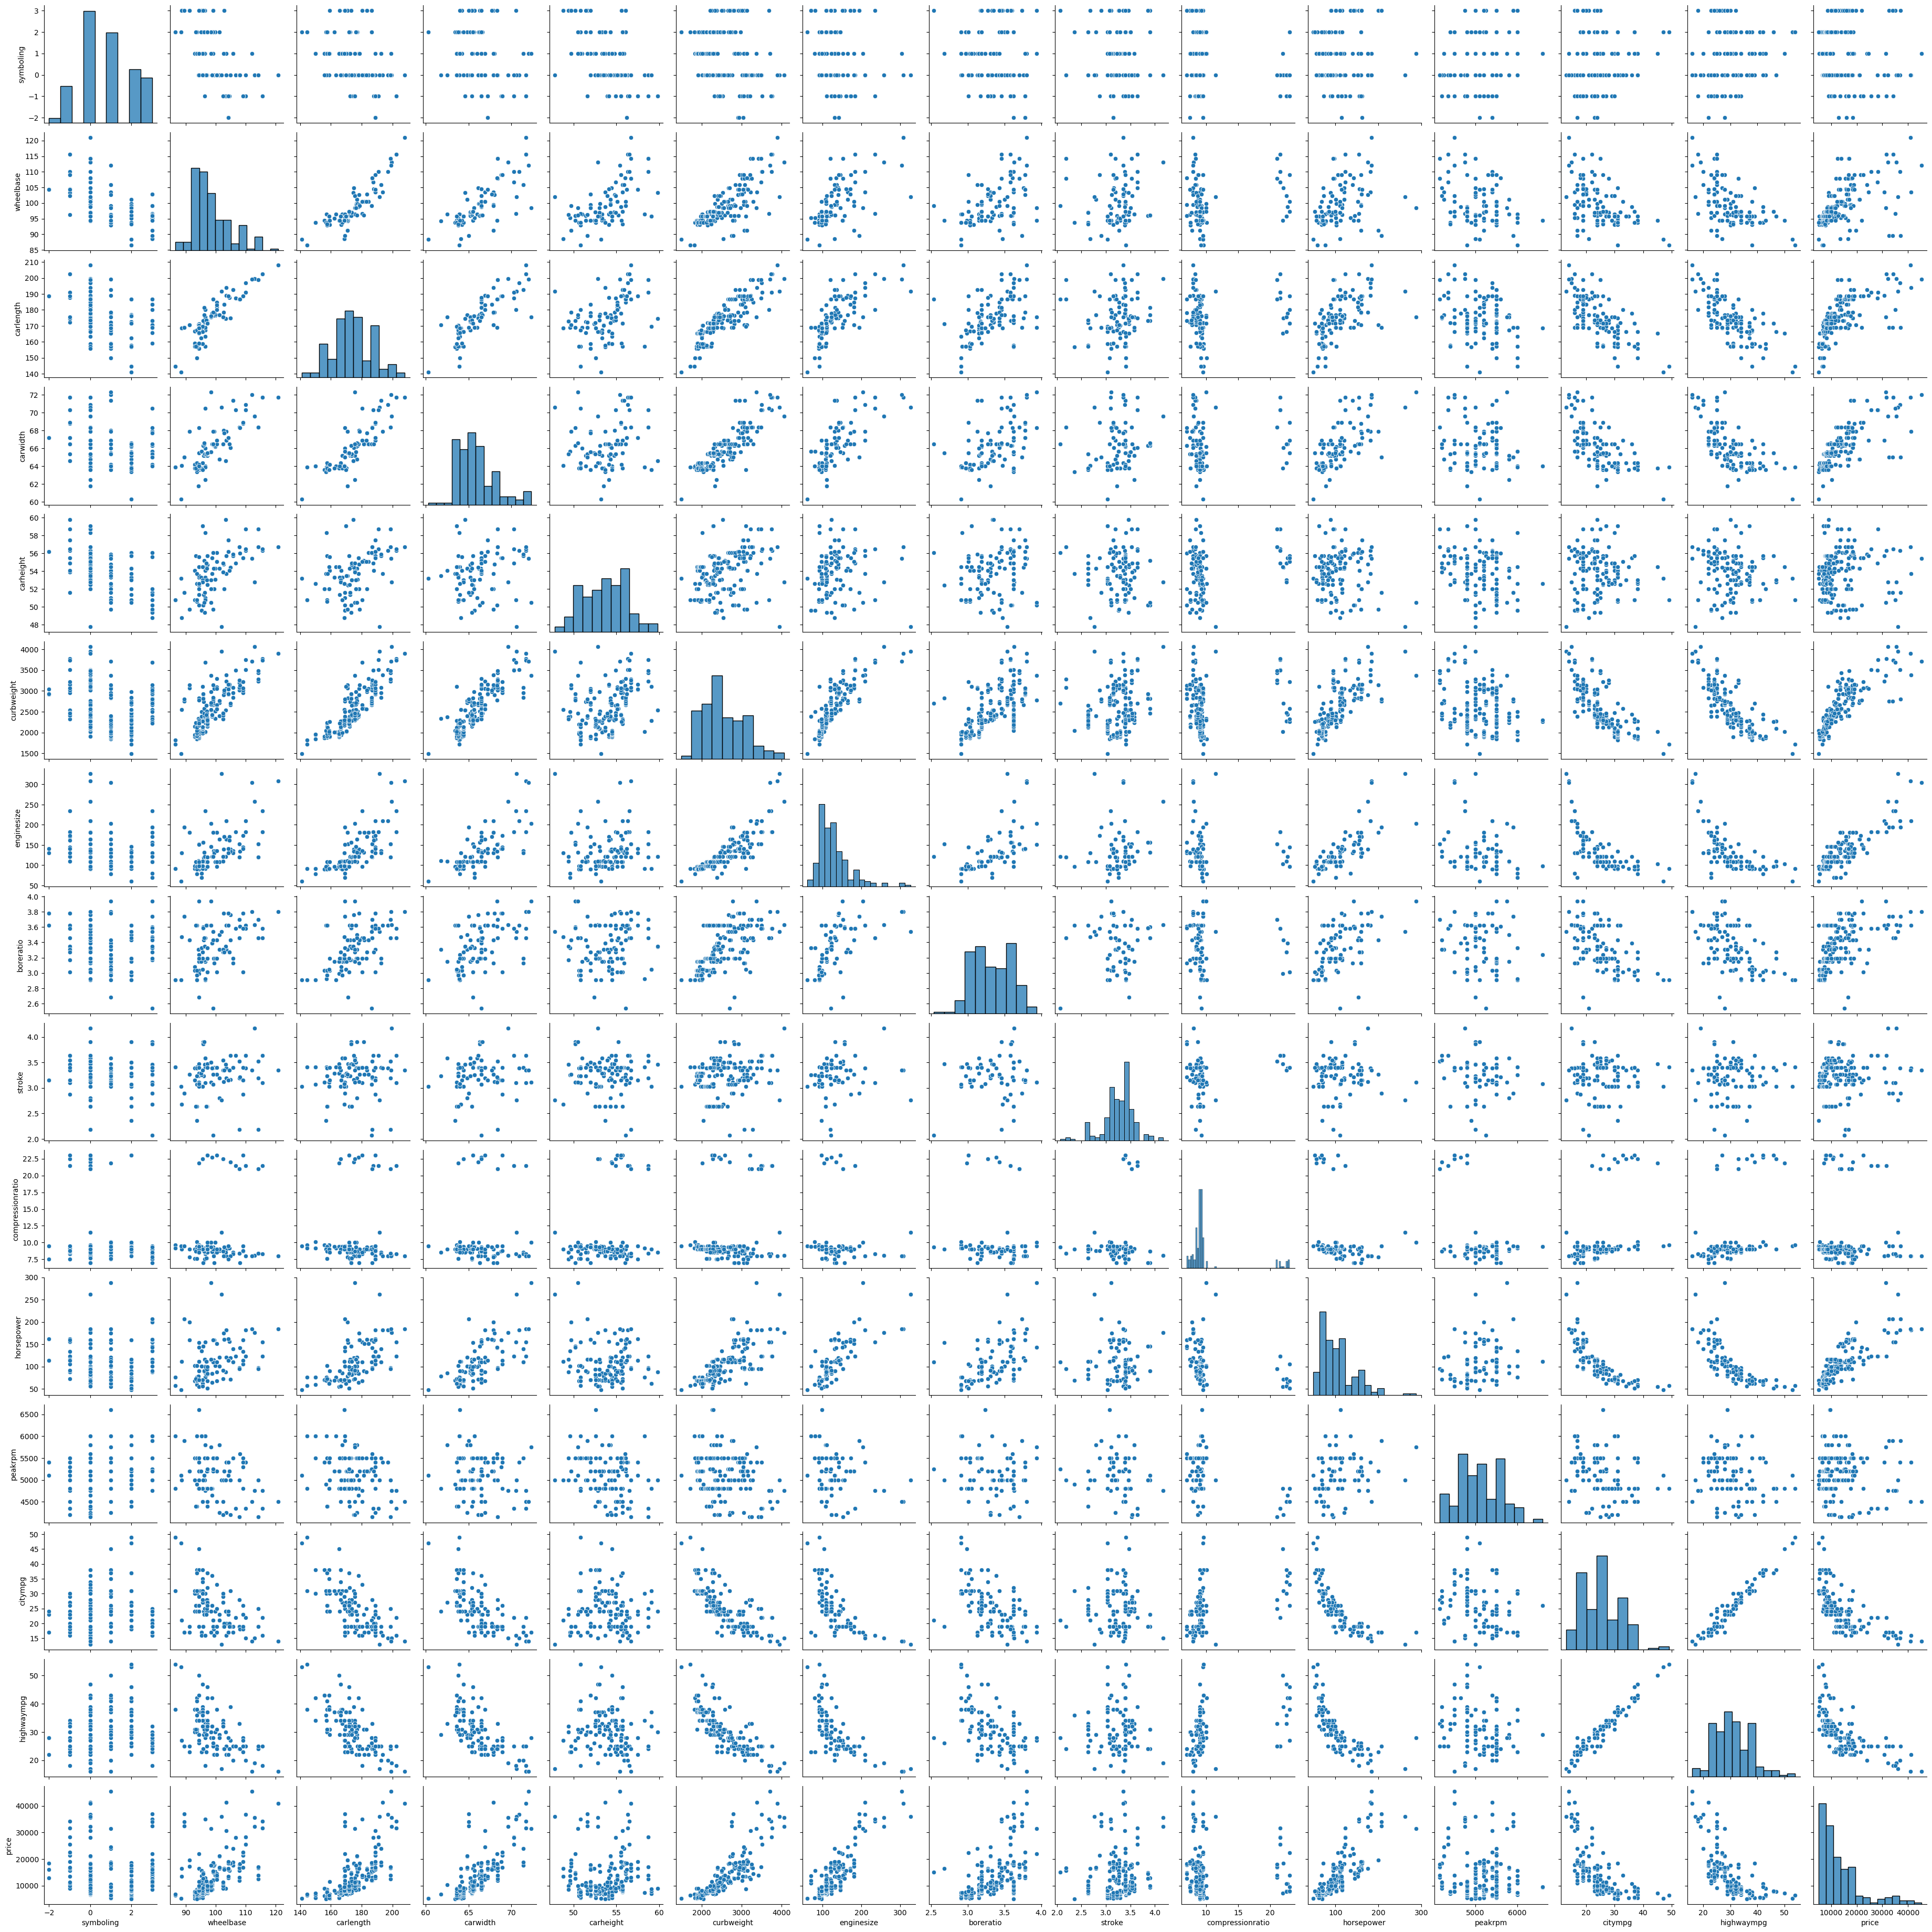

In [17]:
#Visualize the data using seaborn
sns.pairplot(cars)
plt.show()

<Axes: >

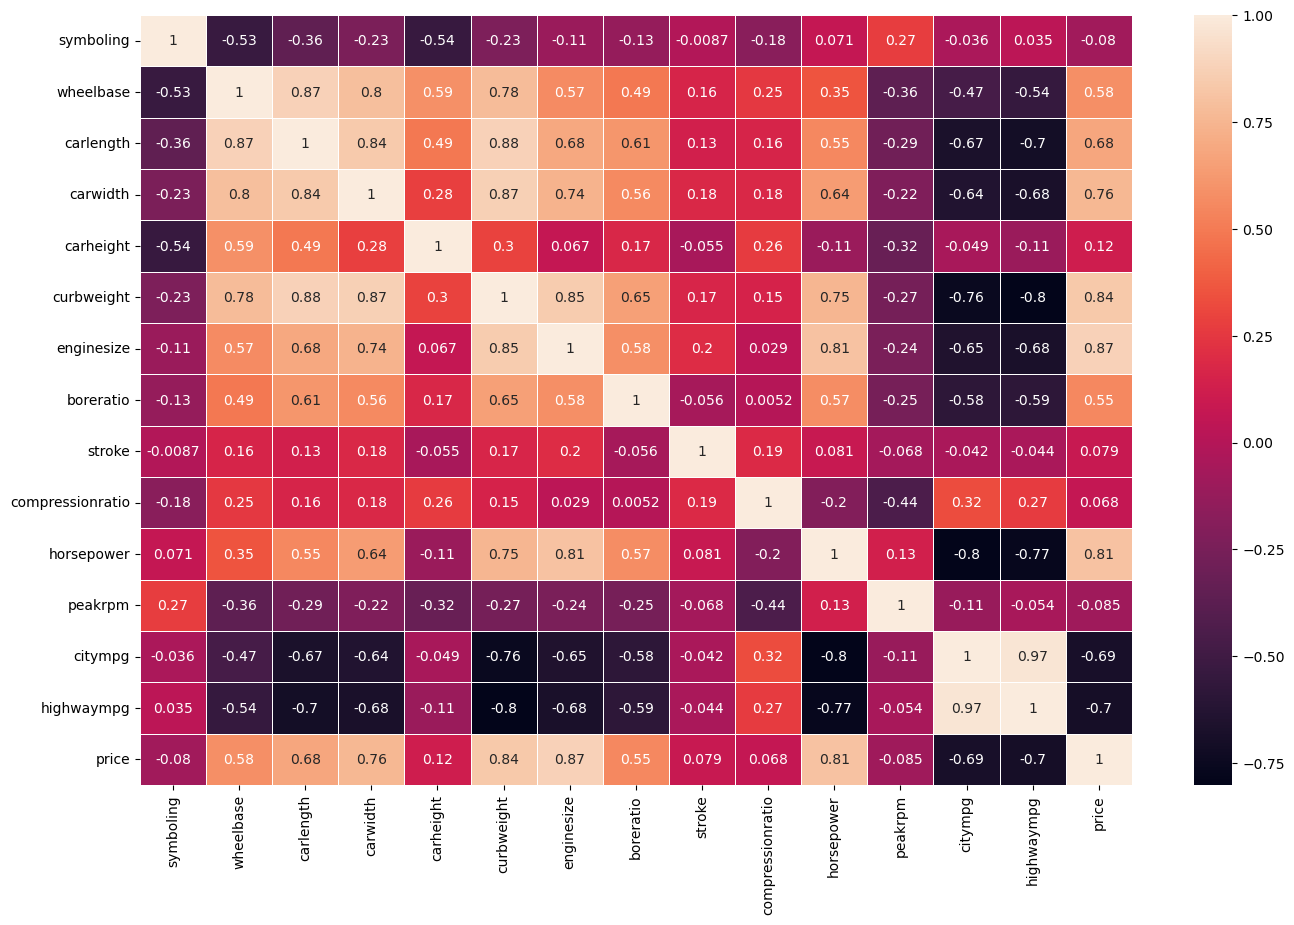

In [18]:
# Let's check correlation between variables 
plt.figure(figsize = (16, 10))
sns.heatmap(cars.corr(), annot = True,linewidths=0.5,linecolor='white')

Now, we have brief idea about which features are related to price. We can see some features have positive relationship with 'price'. 
These are given as follows:

wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower.

However, there are some attributes that show a negative relationship w.r.t price:
citympg, highwaympg.

We can also observe some multicollinearity visible between the predictor variables:

carlength with wheelbase, carwidth and curbweight
curbweight with enginesize, carlength, carwidth and wheelbase
enginesize with horsepower, crubweight and dimensions of car
highwaympg and citympg are highly correlated (~ 0.97).

## 4. Detecting Outliers :-

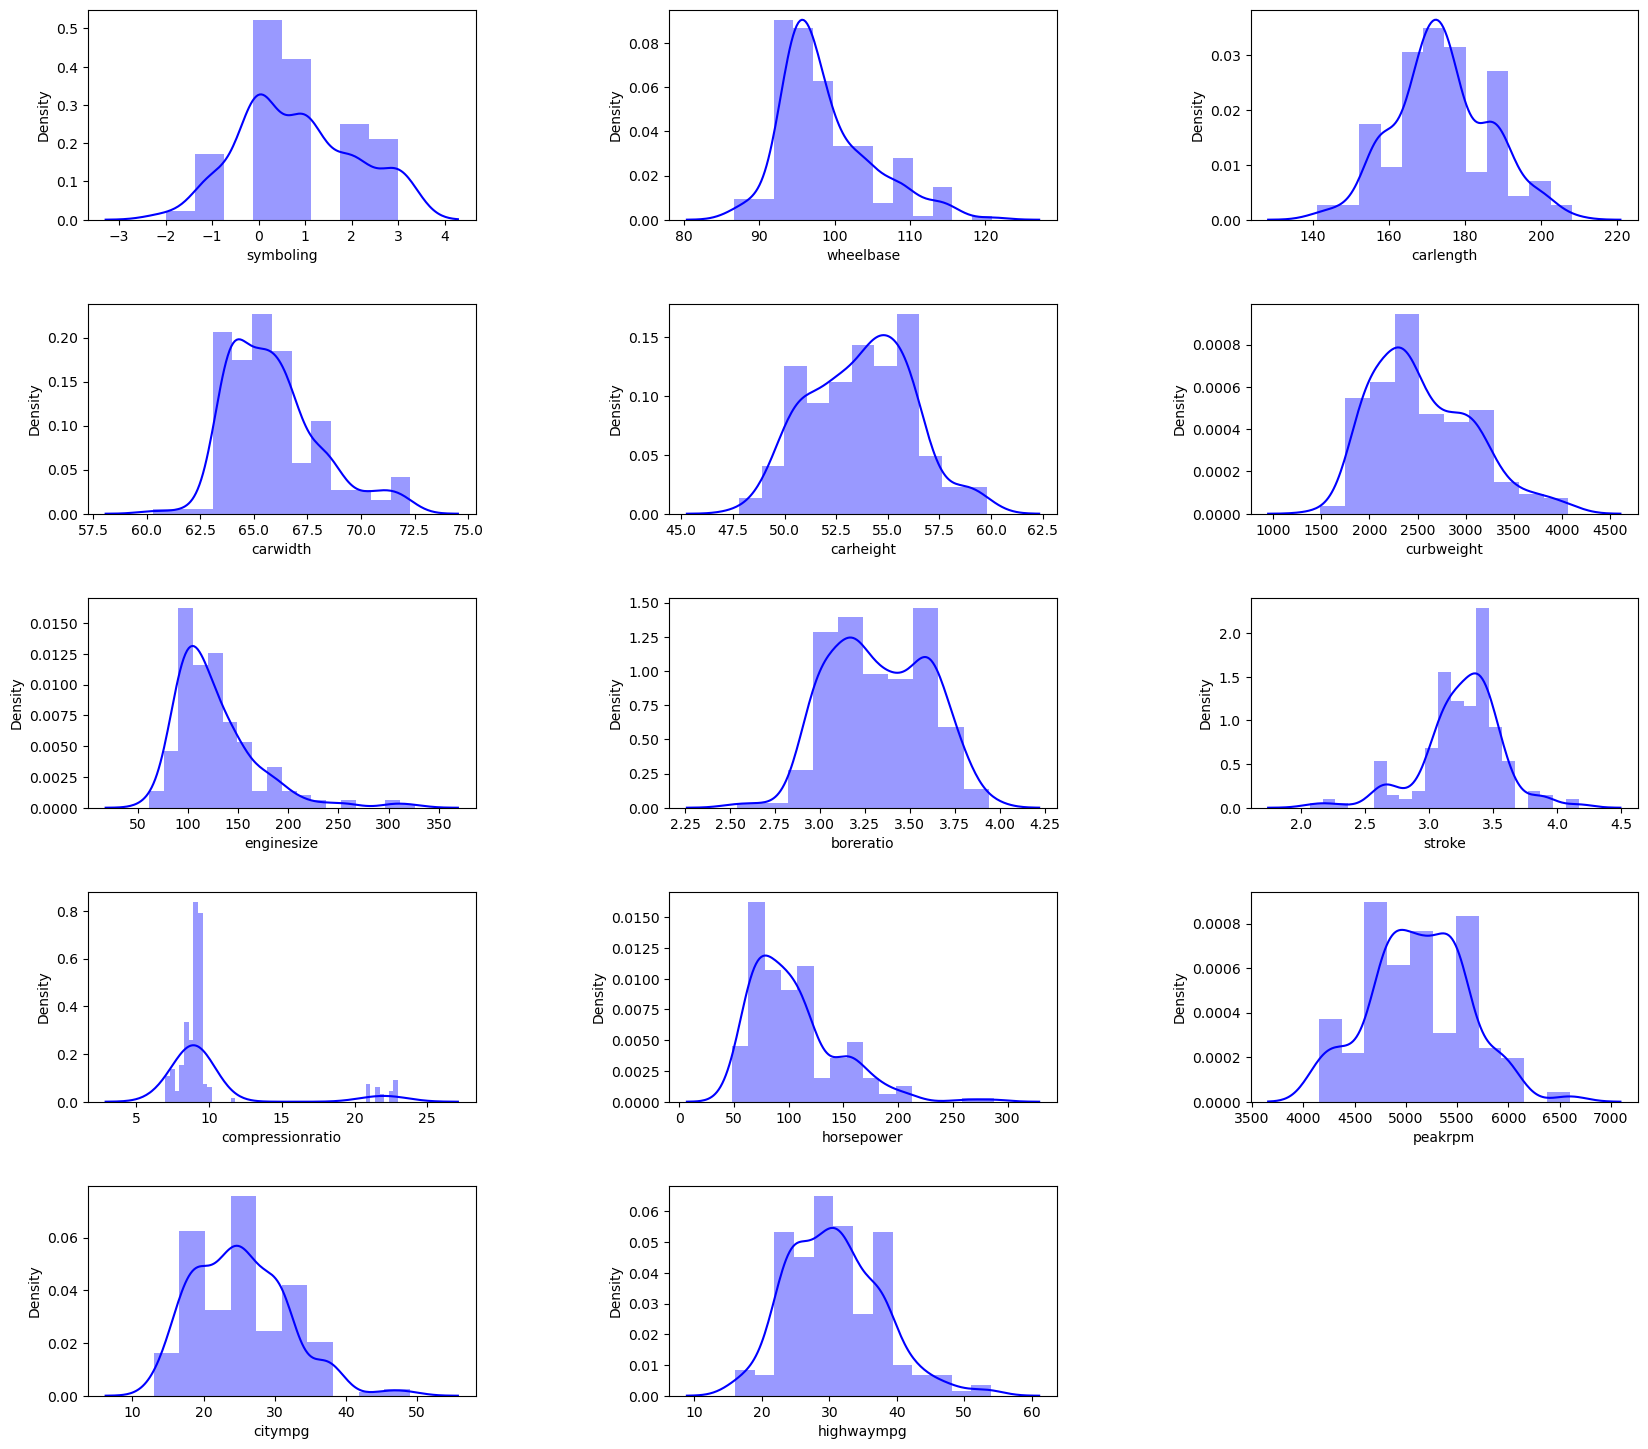

In [19]:
# Detecting outliers in continuous variables
numeric_list = list(cars.columns[cars.dtypes != 'object'])
counter = 1

plt.figure(figsize = (20, 18))

for col_list in numeric_list:
    
    if col_list != 'price':
        
        plt.subplot(5, 3, counter)
        sns.distplot(cars[col_list], hist = True, kde = True, color = 'b')
        
        counter += 1

plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)
plt.show()

### Result :-
There are some variables (like compressionratio, wheelbase, horsepower, etc) which are not normally distributed, i.e., outliers are present. Due to presence of less number of observation, we are not deleting some rows to correct the outliers. We will be doing the scaling in both train and test data to correct this during Model preparation.

# Performing EDA 

## 1. Univariate Analysis :- 

In [20]:
# Custom Function to add data labels

def labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        
            (x_value, y_value),       
            xytext = (0, space),          
            textcoords = "offset points", 
            ha = 'center',                
            va = va)                 

In [21]:
#Function to plot the percentage of car's in the US market with respect to different car features
def plot(df,var_list, sortbyindex=False):
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (df[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('muted', 16))
        ax.set_ylabel('Percentage  Distribution', fontsize=12)
        ax.set_xlabel(var, fontsize=10)
        labels(ax)
        

def plot_cat(var_list):
    #Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = cars)
    plt.show()

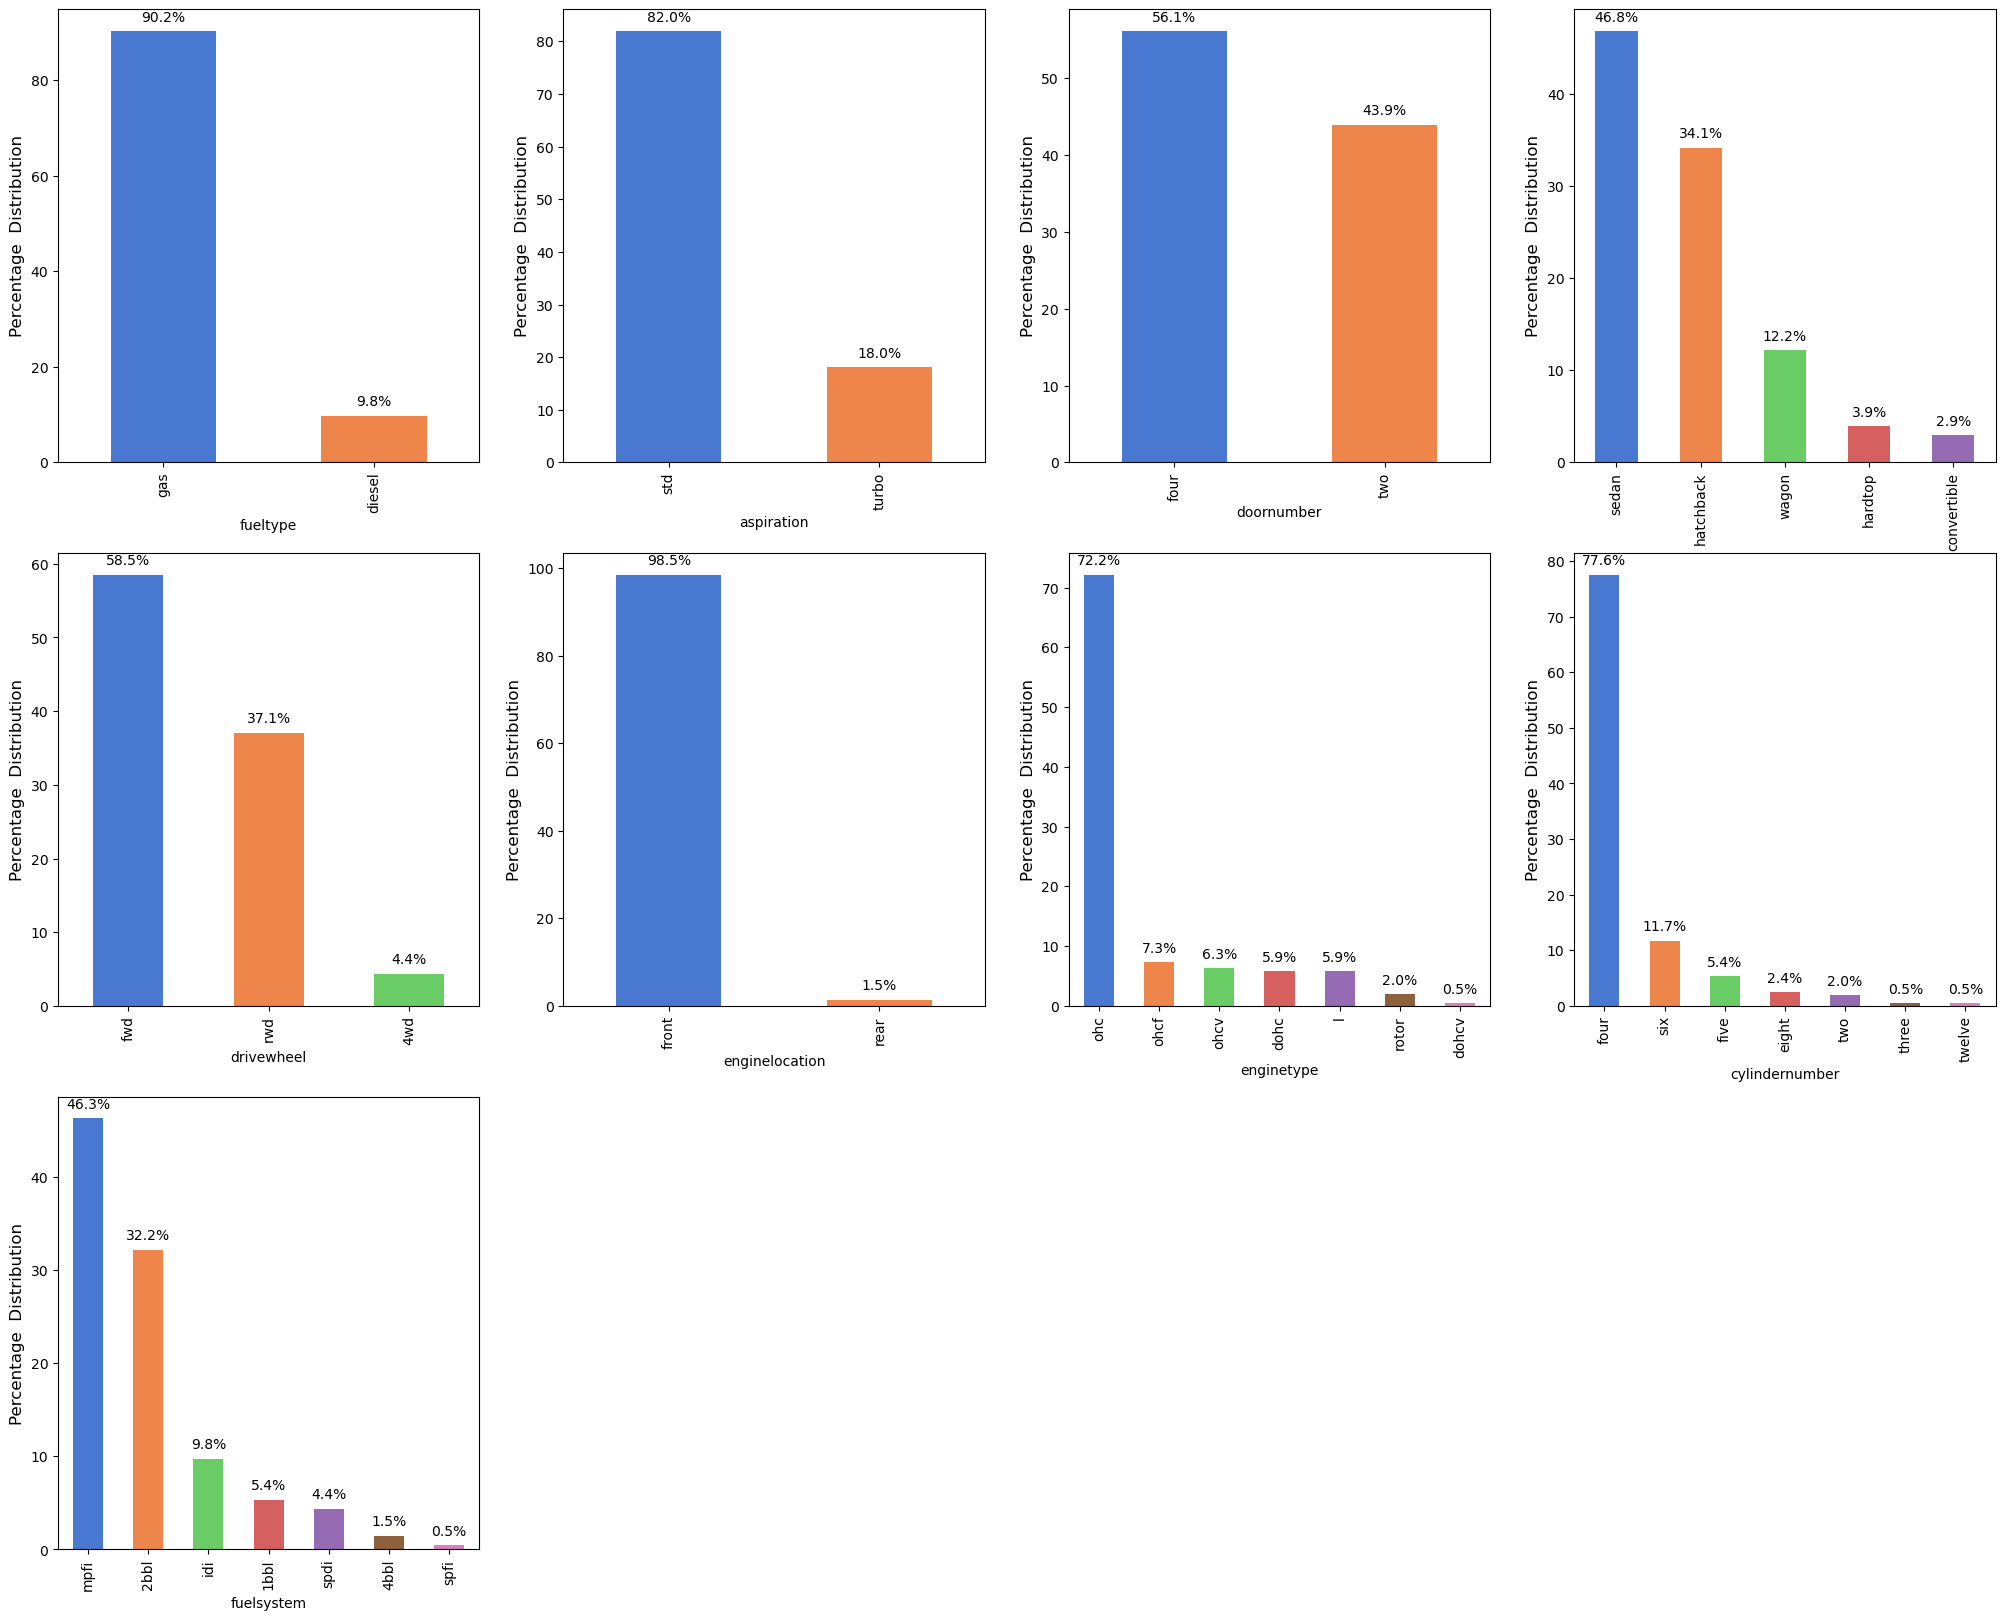

In [22]:
#plotting market percentage of car's with respect to features
plt.figure(figsize=(25, 20))
plot(cars,categorical_vars[:-1])

We can see that some of the car features are popular in the US Automobile Market. Geely Auto can consider these analysis results to satisfy the market needs and make the required changes to their manufacturing line.

### Univariate Analysis Observations :

1. Most preferred fuel type: gas (90.24%)

2. Most preferred aspiration: std (81.95%)

3. Most preferred door number: four (56.10%)

4. Top 3 preferred car body: sedan (46.83%) ;hatchbag (34.15%) ;wagon (12.20%)

5. Top 2 preferred drive wheel: fwd (58.54%) ;rwd (37.07%)

6. Most preferred engine location: front (98.54%)

7. Most preferred engine type: ohc (77.20%)

8. Most preferred cylinder number: four (77.56%)

9. Most preferred fuel system: mpfi (77.20%)

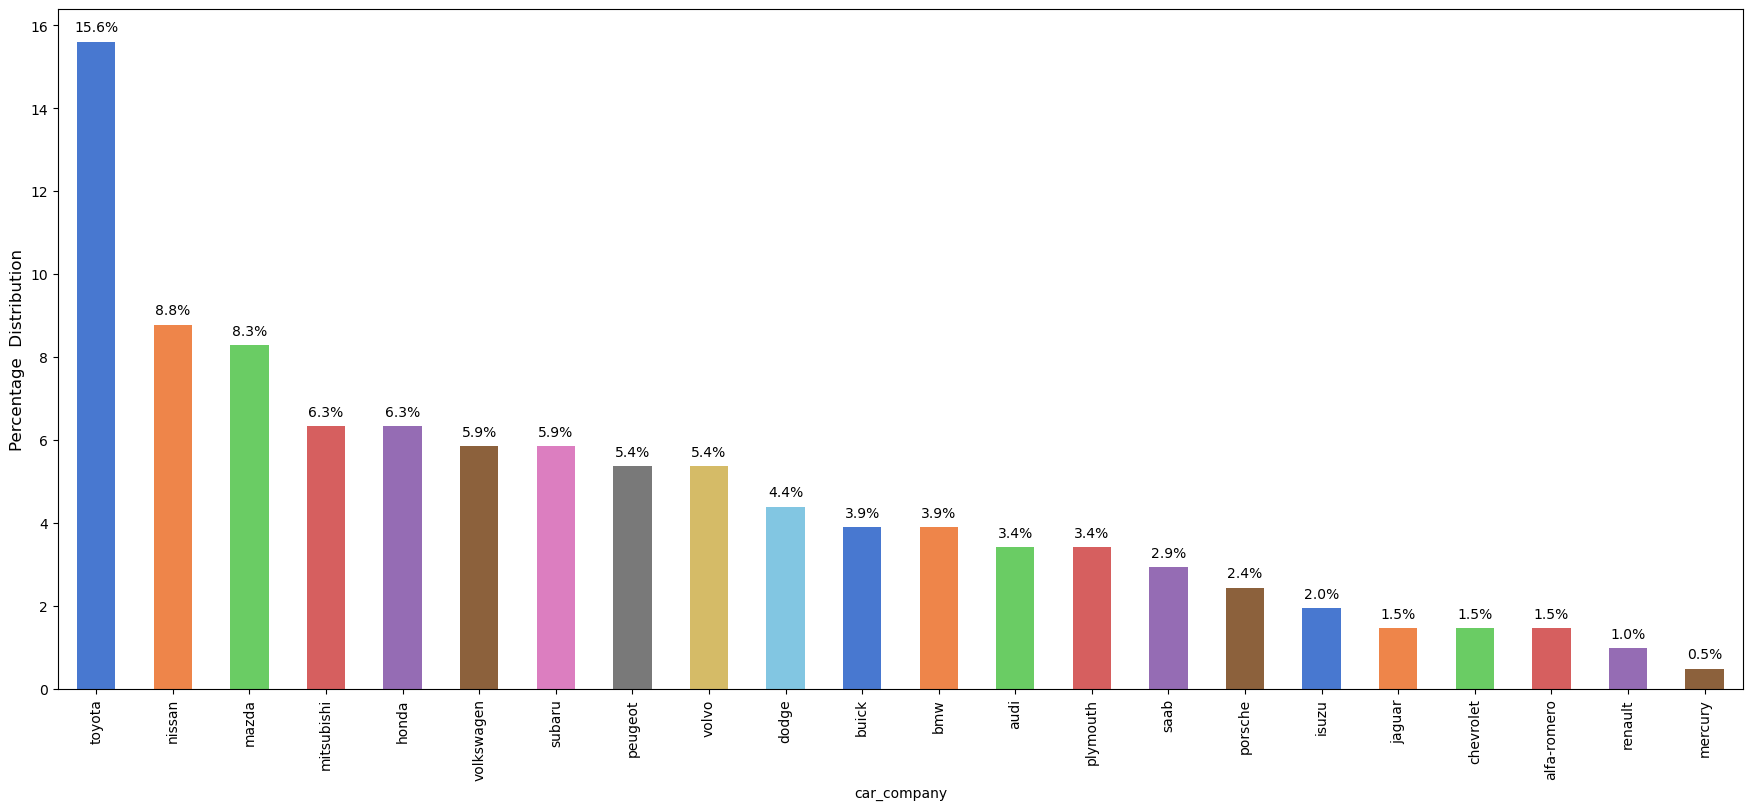

In [23]:
# Plot of Percentage distribution vs Car Company
plt.figure(figsize=(100, 30))
plot(cars,[categorical_vars[-1]])

* We can clearly see that Toyota dominates with 15.6% followed by Nissan with 8.8%, Mazda with 8.2% ; Mitsubishi and Honda are equally popular with 6.3% market percentage.

<Figure size 1500x2500 with 0 Axes>

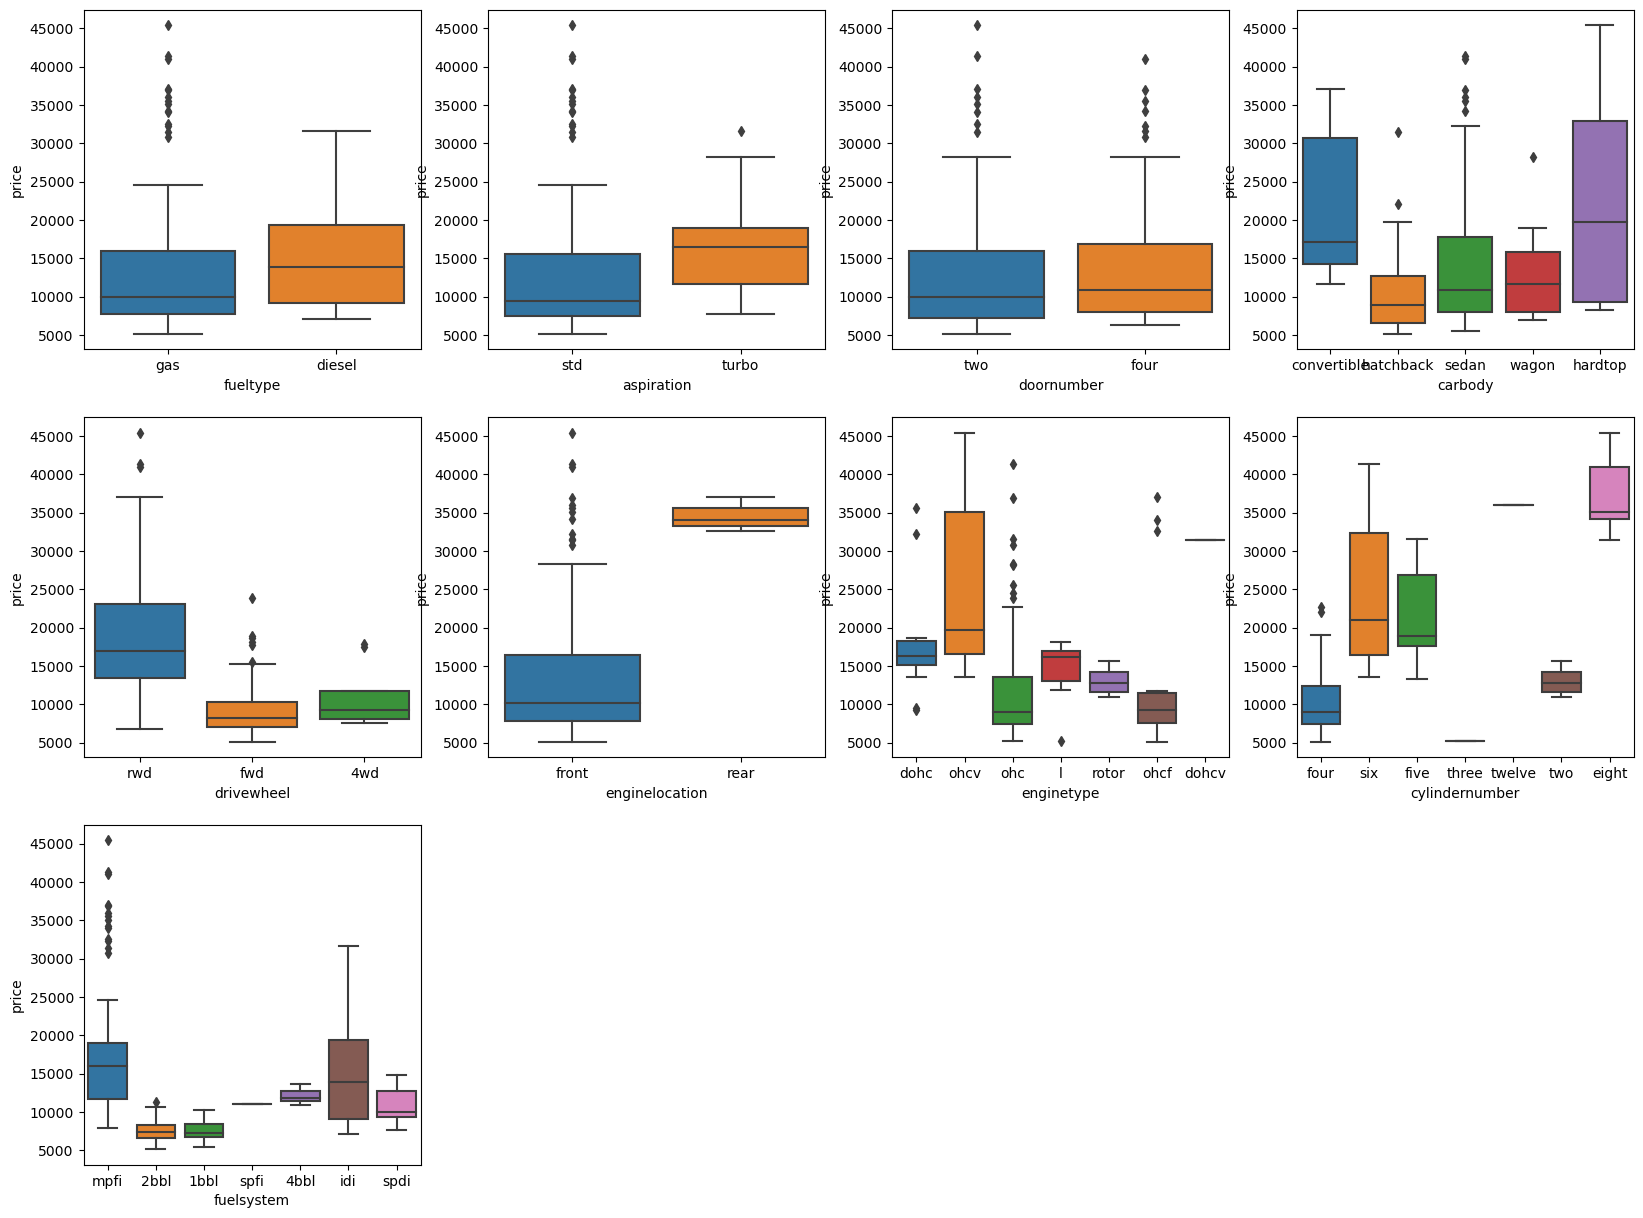

In [24]:
# ploting all the attributes excluding car_company against price
plt.figure(figsize=(15, 25))
plot_cat(categorical_vars[:-1])

* There are some outliers explaining the fact that the companies produce cars of much higher price range than normal market price.

* There is no major significance of price based on fuel type with the exception of expensive cars belonging to fueltype gas.

* Turbo aspiration is bit higher than standard aspiration. Exception - Expensive Cars

* Drive Wheel of rwd (rear wheel drive) is expensive than 4wd (four wheel drive) and fwd (fron wheel drive)

* Rear Enging location is expensive than front.

* Price increases as the cylinder number increases.

Average car price in US:  13276.710570731706
car_company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


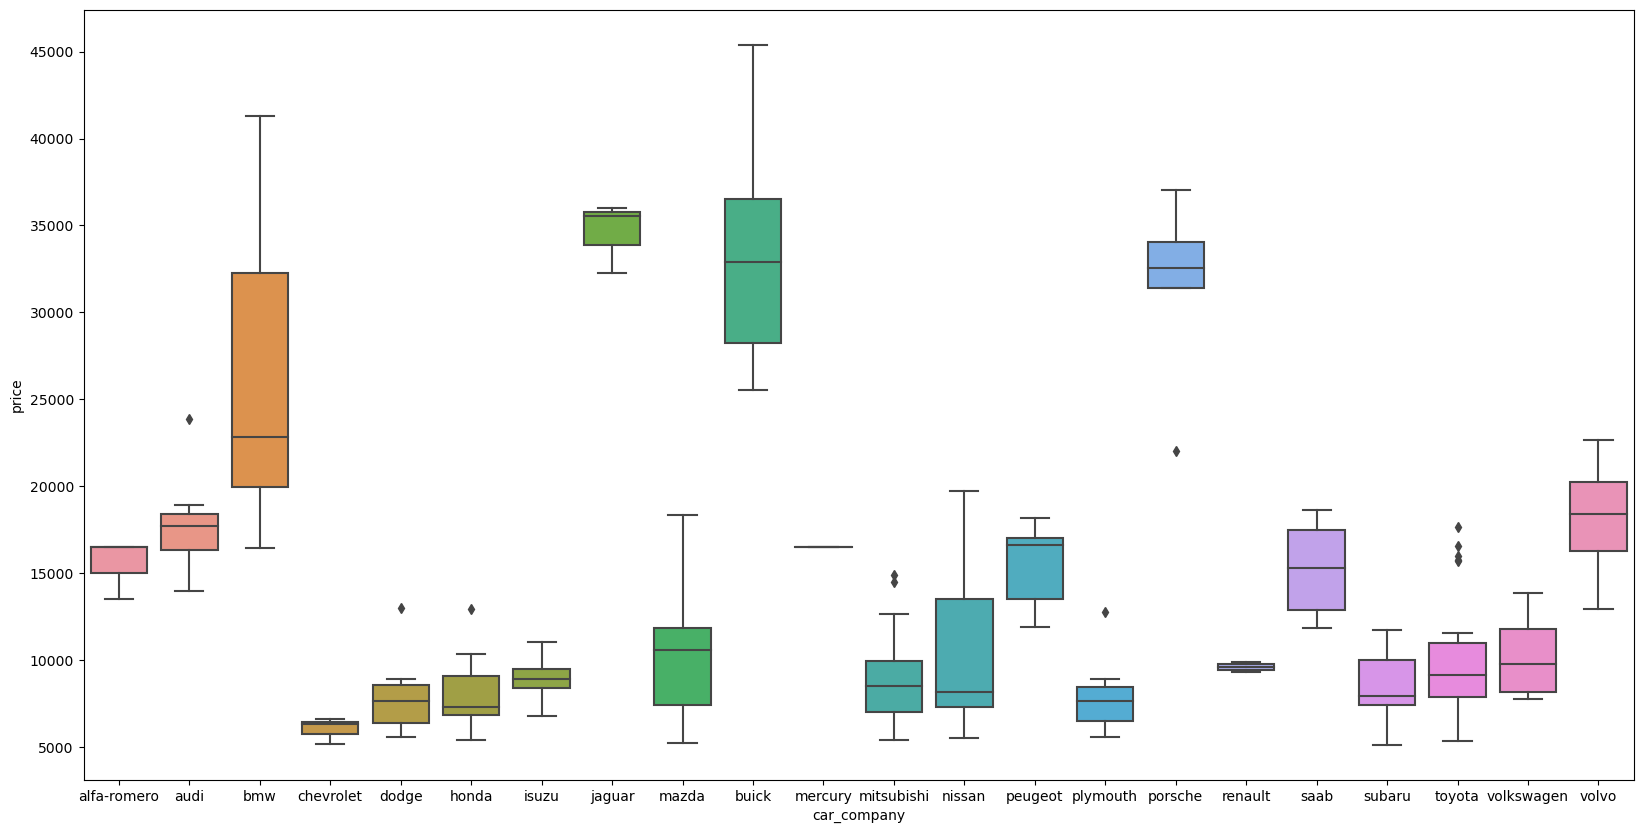

In [25]:
# Plot of price vs various automobiles type
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_vars[-1], y = 'price', data = cars)

print('Average car price in US: ',cars['price'].mean())
print(cars.groupby('car_company').price.mean().sort_values(ascending=False).head())

* There are some outliers for the companies which demonstrates that they do manufacture some expensive cars that are priced      above their usual market pricing range.
* Cars manufacturers like Jaguar, Buick, Porsche, BMW and Volo are on the high end side and are priced well above the other US cars which have an average price of approx $13,000.
* Also, company name shows some affect on the price determination.

## 2. Bivariate Analysis :-

### For Categorical Variables 

<Axes: xlabel='enginetype', ylabel='price'>

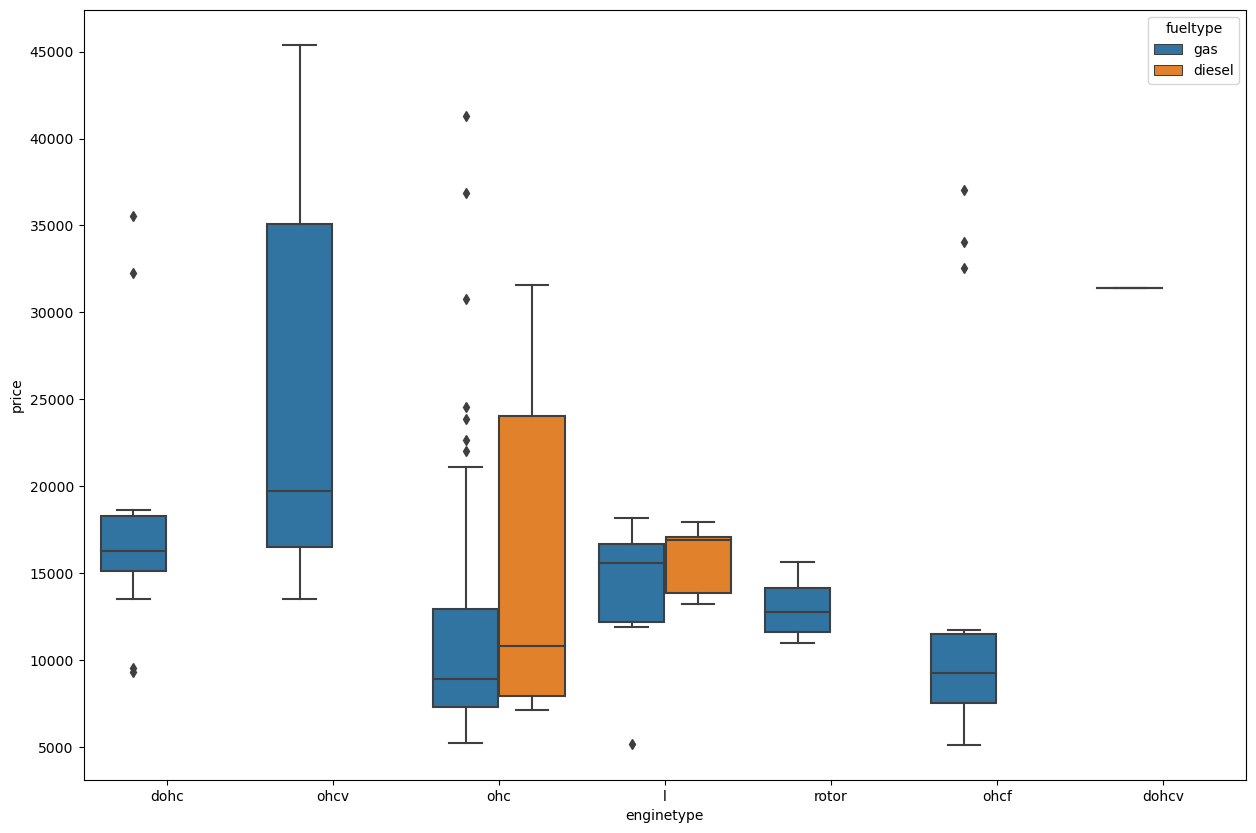

In [26]:
# Plotting of EngineType and FuelType w.r.t price
plt.figure(figsize=(15,10))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=cars)

* OHCV Engine type cars are costliest. 
* Engine type ohcv have higher mean price than ohc and ohcf.

<Axes: xlabel='enginetype', ylabel='price'>

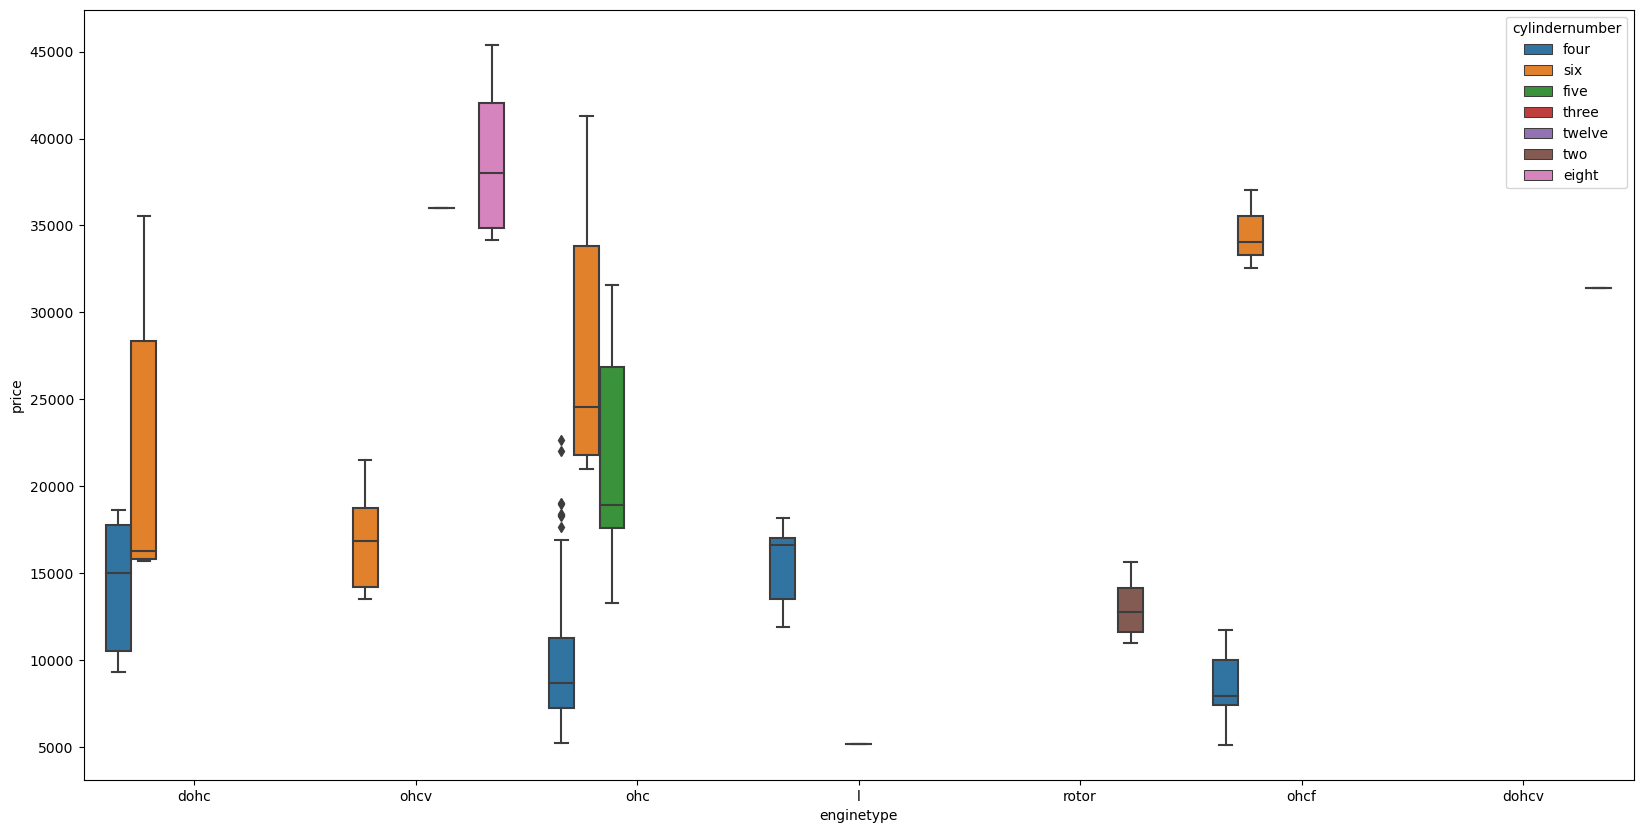

In [27]:
# Plotting of Enginetype vs CylinderNumber w.r.t proice
plt.figure(figsize=(20,10))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=cars)

* OHCV Engine cars with 8 cylinders seems to be most expensive. 
* Cars with 4 cylinders are cost effective compare to other cylindernumber type irrespective of Enginevtype.

<Axes: xlabel='carbody', ylabel='price'>

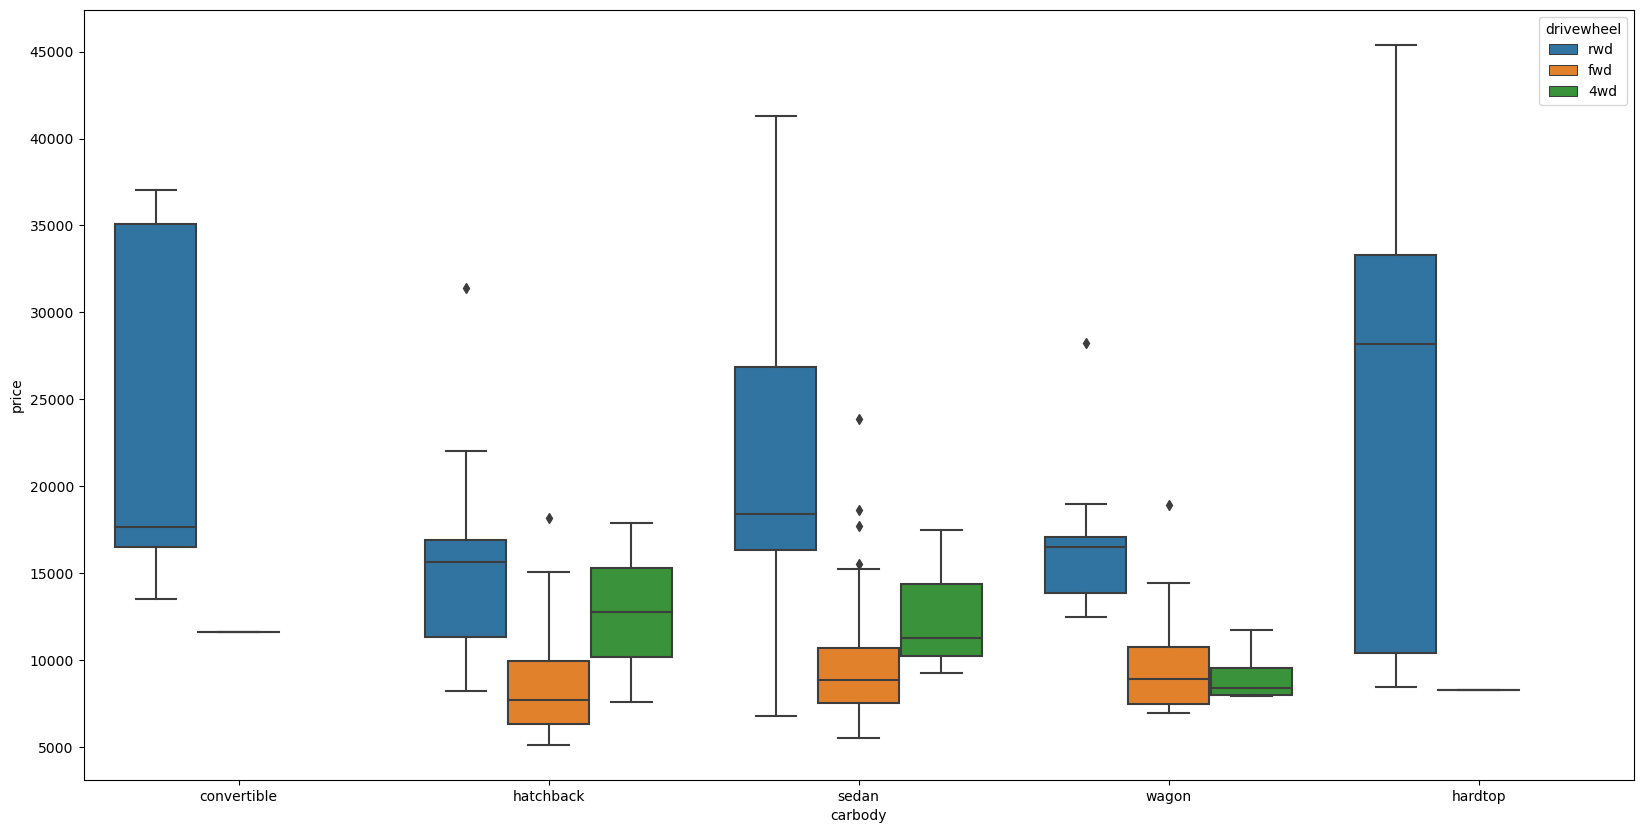

In [28]:
# Plotting of Carbody vs Driverwheel w.r.t Price
plt.figure(figsize=(20,10))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=cars)

* Hatchback,Sedan and Wagon bodytype cars are least expensive with fwd driverwheel model.
* Hardtop car body is most expensive model w.r.t driver wheel.

### For Continuous Variables 

<Axes: >

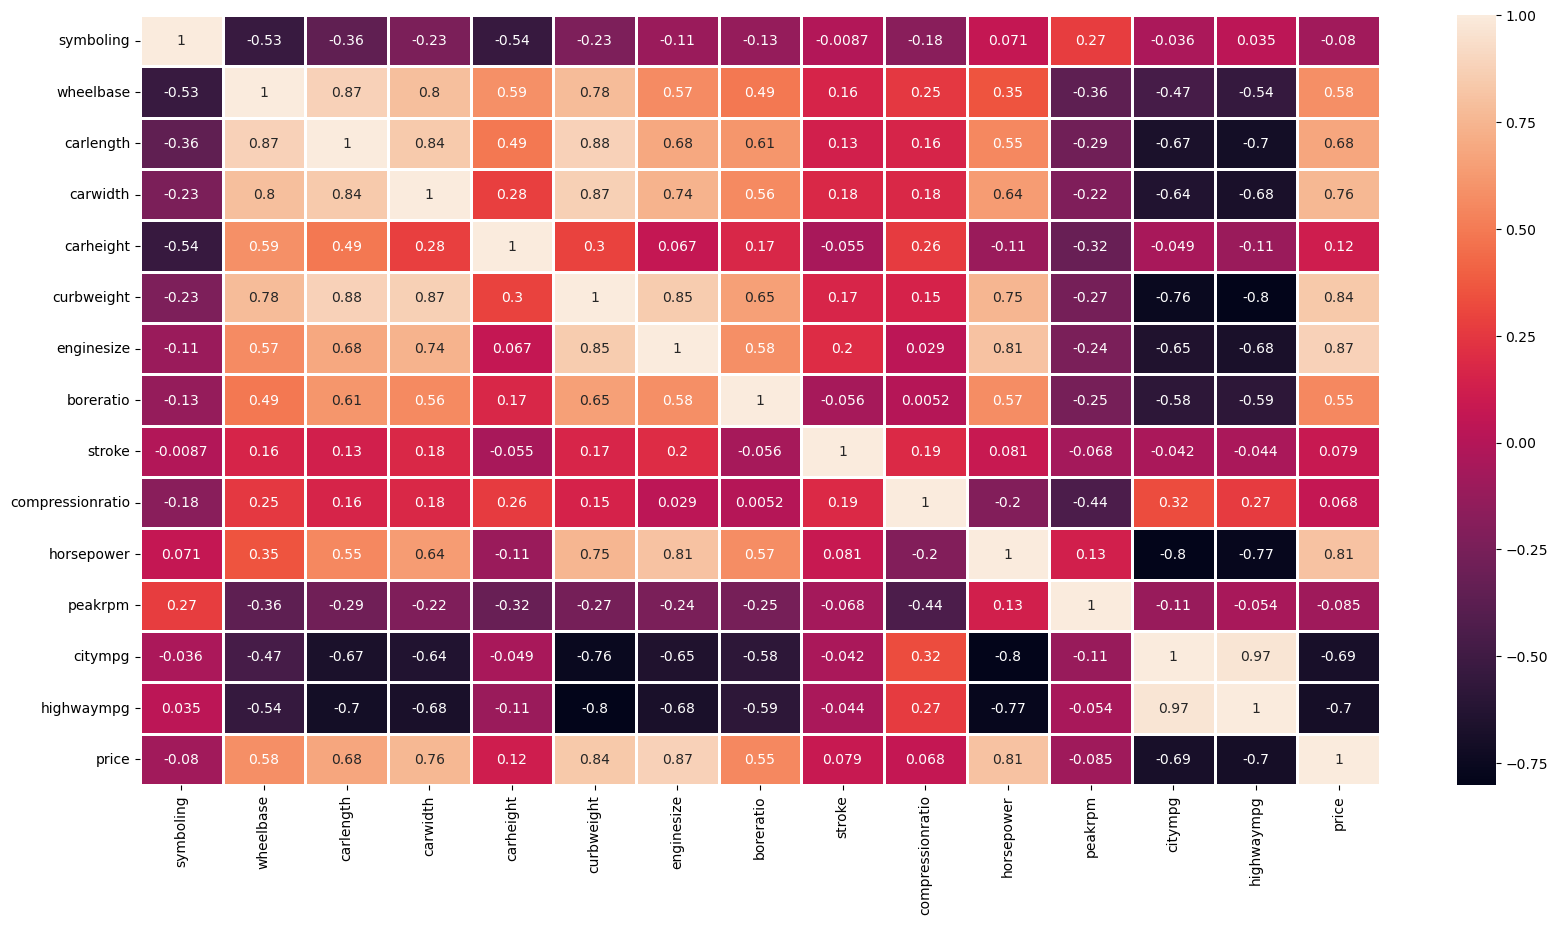

In [29]:
# Generate heat map

plt.figure(figsize = (20,10))  

sns.heatmap(cars.corr(),annot = True,linewidths=1,linecolor='w')

### Bivariate Analysis ( Continuous Variables Observations) :

* Price is positively correlated with:

  enginesize (0.87)

  curbweight (0.84)

  horsepower (0.81)

  carwidth (0.76)

  carlength (0.68)


* Price is negatively correlated with: highwaympg (-0.7) , citympg (-0.69).

* There is a high correlation between highwaympg and citympg (Corr value = 0.97).

 As from the heatmap, we noticed there is a high correlation between carlength, carwidth, carheight and city vs highway mpg's. Let us create new derived variables so that we can reduce multicollinearlity.

In [30]:
# Creating Derived variables 
cars['car_dimension']=cars.carlength*cars.carwidth*cars.carheight
cars['hc_mpg_ratio'] = cars.highwaympg/cars.citympg

## dropping the orignal variables
cars.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

# Model Preparation 

According to the Data Dictionary, Variable symboling is insurance risk rating with +3 as risky and -3 as pretty safe. Since it is a categorical field, so the values can be divided into categories like:

* risky for range [2, 3]
* moderate for range [0, 1]
* safe for range [-1, -3]

In [31]:
 # Initial Value of variable symboling
cars.symboling.value_counts(sort = False, dropna = False)

 3    27
 1    54
 2    32
 0    67
-1    22
-2     3
Name: symboling, dtype: int64

In [32]:
# Set values in the variable symboling using dictionary
cars['symboling'] = cars['symboling'].map({ 3: 'risky',
                                          2: 'risky',
                                          1: 'moderate',
                                          0: 'moderate',
                                         -1: 'safe',
                                         -2: 'safe',
                                         -3: 'safe'})

# Mapping the column as Category data type
cars['symboling'] = cars['symboling'].astype('str')

# Final Value of variable symboling
cars.symboling.value_counts(sort = False, dropna = False)

risky        59
moderate    121
safe         25
Name: symboling, dtype: int64

We saw that the company brand value also is determinig the price of the car. Let us create a company_seg categorical variable which would tell us that under which segment tier does the car_company comes under. We will segment the car companies based on the mean company price as:

* if company mean price is below 10,000 then it is a Low price.          
* if company mean price is above 10,000 and below 20,000 then it is a medium price.
* if company mean price is above 20,000 then it is expensive.

In [33]:
# Statistics of car company with price
cars[['car_company', 'price']].describe()

price
count    205.000000
mean   13276.710571
std     7988.852332
min     5118.000000
25%     7788.000000
50%    10295.000000
75%    16503.000000
max    45400.000000

In [34]:
# Companies car Avergae price from higher to lower
cars.groupby('car_company').price.median().sort_values(ascending=False)

car_company
jaguar         35550.0
buick          32892.0
porsche        32528.0
bmw            22835.0
volvo          18420.0
audi           17710.0
peugeot        16630.0
mercury        16503.0
alfa-romero    16500.0
saab           15275.0
mazda          10595.0
volkswagen      9737.5
renault         9595.0
toyota          9103.0
isuzu           8916.5
mitsubishi      8499.0
nissan          8124.0
subaru          7894.0
dodge           7609.0
plymouth        7609.0
honda           7295.0
chevrolet       6295.0
Name: price, dtype: float64

In [35]:
# Function to get company_category
def get_company_category():
    
    for company_list in cars.car_company.unique():
        
        df = cars[cars['car_company'] == company_list]
        
        if df.price.median() > 20000:
            category = 'Expensive'
        elif df.price.median() > 10000:
            category = 'Midprice'        
        else:
            category = 'Lowprice'
        
        cars.loc[cars['car_company'] == company_list, 'company_category'] = category
        
    # Mapping the column as string data type
    cars['company_category'] = cars['company_category'].astype('str')

# Call Function
get_company_category()

# Data Glimpse
pd.crosstab(cars.car_company, cars.company_category)

company_category  Expensive  Lowprice  Midprice
car_company                                    
alfa-romero               0         0         3
audi                      0         0         7
bmw                       8         0         0
buick                     8         0         0
chevrolet                 0         3         0
dodge                     0         9         0
honda                     0        13         0
isuzu                     0         4         0
jaguar                    3         0         0
mazda                     0         0        17
mercury                   0         0         1
mitsubishi                0        13         0
nissan                    0        18         0
peugeot                   0         0        11
plymouth                  0         7         0
porsche                   5         0         0
renault                   0         2         0
saab                      0         0         6
subaru                    0        12         0
toyota                    0        32         0
volkswagen                0        12         0
volvo                     0         0        11

In [36]:
# Cars Category grouped according to mean price
cars.groupby('company_category').price.mean()

company_category
Expensive    30788.687500
Lowprice      9226.168000
Midprice     14812.967268
Name: price, dtype: float64

In [37]:
# Converting categorical variables with two levels to either 1 or 0
cars['fueltype'] = cars['fueltype'].map({'gas': 1, 'diesel': 0})
cars['aspiration'] = cars['aspiration'].map({'std': 1, 'turbo': 0})
cars['doornumber'] = cars['doornumber'].map({'two': 1, 'four': 0})
cars['enginelocation'] = cars['enginelocation'].map({'front': 1, 'rear': 0})
cars.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0     risky         1           1           1  convertible        rwd   
1     risky         1           1           1  convertible        rwd   
2  moderate         1           1           1    hatchback        rwd   
3     risky         1           1           0        sedan        fwd   
4     risky         1           1           0        sedan        4wd   

   enginelocation  wheelbase  curbweight enginetype  ... boreratio  stroke  \
0               1       88.6        2548       dohc  ...      3.47    2.68   
1               1       88.6        2548       dohc  ...      3.47    2.68   
2               1       94.5        2823       ohcv  ...      2.68    3.47   
3               1       99.8        2337        ohc  ...      3.19    3.40   
4               1       99.4        2824        ohc  ...      3.19    3.40   

  compressionratio  horsepower  peakrpm    price  car_company  car_dimension  \
0              9.0         111     5000  13495.0  alfa-romero     528019.904   
1              9.0         111     5000  16500.0  alfa-romero     528019.904   
2              9.0         154     5000  16500.0  alfa-romero     587592.640   
3             10.0         102     5500  13950.0         audi     634816.956   
4              8.0         115     5500  17450.0         audi     636734.832   

   hc_mpg_ratio company_category  
0      1.285714         Midprice  
1      1.285714         Midprice  
2      1.368421         Midprice  
3      1.250000         Midprice  
4      1.222222         Midprice  

[5 rows x 23 columns]

In [38]:
# Dropping the orignal car_company variable to avoid unnecessary dummy variables creation
cars.drop('car_company',axis=1,inplace=True)
print("Shape of the Dataframe is :",cars.shape)
cars.head()

Shape of the Dataframe is : (205, 22)


symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0     risky         1           1           1  convertible        rwd   
1     risky         1           1           1  convertible        rwd   
2  moderate         1           1           1    hatchback        rwd   
3     risky         1           1           0        sedan        fwd   
4     risky         1           1           0        sedan        4wd   

   enginelocation  wheelbase  curbweight enginetype  ... fuelsystem  \
0               1       88.6        2548       dohc  ...       mpfi   
1               1       88.6        2548       dohc  ...       mpfi   
2               1       94.5        2823       ohcv  ...       mpfi   
3               1       99.8        2337        ohc  ...       mpfi   
4               1       99.4        2824        ohc  ...       mpfi   

   boreratio stroke  compressionratio  horsepower  peakrpm    price  \
0       3.47   2.68               9.0         111     5000  13495.0   
1       3.47   2.68               9.0         111     5000  16500.0   
2       2.68   3.47               9.0         154     5000  16500.0   
3       3.19   3.40              10.0         102     5500  13950.0   
4       3.19   3.40               8.0         115     5500  17450.0   

   car_dimension  hc_mpg_ratio  company_category  
0     528019.904      1.285714          Midprice  
1     528019.904      1.285714          Midprice  
2     587592.640      1.368421          Midprice  
3     634816.956      1.250000          Midprice  
4     636734.832      1.222222          Midprice  

[5 rows x 22 columns]

In [39]:
#Create Dummies for the categorical Variables
categorical_vars = list(cars.columns[cars.dtypes == 'object'])
print("List of Categorical Variables are :", categorical_vars)

print(" ")

cars=pd.get_dummies(cars, columns=categorical_vars)

List of Categorical Variables are : ['symboling', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'company_category']
 


In [40]:
# Now checking the shape of dataframe
print("Shape of Cars Dataframe now is :",cars.shape)

# Let's have a look at cars dataframe
cars.head()

Shape of Cars Dataframe now is : (205, 50)


fueltype  aspiration  doornumber  enginelocation  wheelbase  curbweight  \
0         1           1           1               1       88.6        2548   
1         1           1           1               1       88.6        2548   
2         1           1           1               1       94.5        2823   
3         1           1           0               1       99.8        2337   
4         1           1           0               1       99.4        2824   

   enginesize  boreratio  stroke  compressionratio  ...  fuelsystem_1bbl  \
0         130       3.47    2.68               9.0  ...                0   
1         130       3.47    2.68               9.0  ...                0   
2         152       2.68    3.47               9.0  ...                0   
3         109       3.19    3.40              10.0  ...                0   
4         136       3.19    3.40               8.0  ...                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mpfi  \
0                0                0               0                1   
1                0                0               0                1   
2                0                0               0                1   
3                0                0               0                1   
4                0                0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  company_category_Expensive  \
0                0                0                           0   
1                0                0                           0   
2                0                0                           0   
3                0                0                           0   
4                0                0                           0   

   company_category_Lowprice  company_category_Midprice  
0                          0                          1  
1                          0                          1  
2                          0                          1  
3                          0                          1  
4                          0                          1  

[5 rows x 50 columns]

# Training ; Testing & Splitting the dataset

In [41]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio',
            'car_dimension','stroke','compressionratio','peakrpm','price','hc_mpg_ratio']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  curbweight  \
122         1           1           0               1   0.244828    0.272692   
125         1           1           1               1   0.272414    0.500388   
166         1           1           1               1   0.272414    0.314973   
1           1           1           1               1   0.068966    0.411171   
199         1           0           0               1   0.610345    0.647401   

     enginesize  boreratio    stroke  compressionratio  ...  fuelsystem_1bbl  \
122    0.139623   0.230159  0.525253           0.15000  ...                0   
125    0.339623   1.000000  0.464646           0.15625  ...                0   
166    0.139623   0.444444  0.449495           0.15000  ...                0   
1      0.260377   0.626984  0.247475           0.12500  ...                0   
199    0.260377   0.746032  0.484848           0.03125  ...                0   

     fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mpfi  \
122                1                0               0                0   
125                0                0               0                1   
166                0                0               0                1   
1                  0                0               0                1   
199                0                0               0                1   

     fuelsystem_spdi  fuelsystem_spfi  company_category_Expensive  \
122                0                0                           0   
125                0                0                           1   
166                0                0                           0   
1                  0                0                           0   
199                0                0                           0   

     company_category_Lowprice  company_category_Midprice  
122                          1                          0  
125                          0                          0  
166                          1                          0  
1                            0                          1  
199                          0                          1  

[5 rows x 50 columns]

In [43]:
df_train.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  143.000000  143.000000  143.000000      143.000000  143.000000   
mean     0.909091    0.818182    0.440559        0.993007    0.411141   
std      0.288490    0.387050    0.498199        0.083624    0.205581   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    1.000000    0.000000        1.000000    0.272414   
50%      1.000000    1.000000    0.000000        1.000000    0.341379   
75%      1.000000    1.000000    1.000000        1.000000    0.503448   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

       curbweight  enginesize   boreratio      stroke  compressionratio  ...  \
count  143.000000  143.000000  143.000000  143.000000        143.000000  ...   
mean     0.407878    0.241351    0.497946    0.535389          0.190787  ...   
std      0.211269    0.154619    0.207140    0.157843          0.237181  ...   
min      0.000000    0.000000    0.000000    0.000000          0.000000  ...   
25%      0.245539    0.135849    0.305556    0.464646          0.100000  ...   
50%      0.355702    0.184906    0.500000    0.545455          0.125000  ...   
75%      0.559542    0.301887    0.682540    0.611111          0.150000  ...   
max      1.000000    1.000000    1.000000    1.000000          1.000000  ...   

       fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
count       143.000000       143.000000       143.000000      143.000000   
mean          0.055944         0.349650         0.020979        0.090909   
std           0.230621         0.478536         0.143818        0.288490   
min           0.000000         0.000000         0.000000        0.000000   
25%           0.000000         0.000000         0.000000        0.000000   
50%           0.000000         0.000000         0.000000        0.000000   
75%           0.000000         1.000000         0.000000        0.000000   
max           1.000000         1.000000         1.000000        1.000000   

       fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
count       143.000000       143.000000            143.0   
mean          0.440559         0.041958              0.0   
std           0.498199         0.201198              0.0   
min           0.000000         0.000000              0.0   
25%           0.000000         0.000000              0.0   
50%           0.000000         0.000000              0.0   
75%           1.000000         0.000000              0.0   
max           1.000000         1.000000              0.0   

       company_category_Expensive  company_category_Lowprice  \
count                  143.000000                 143.000000   
mean                     0.118881                   0.615385   
std                      0.324786                   0.488214   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   1.000000   
75%                      0.000000                   1.000000   
max                      1.000000                   1.000000   

       company_category_Midprice  
count                 143.000000  
mean                    0.265734  
std                     0.443276  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 50 columns]

In [44]:
# seperate the dependent variable from the train dataset
y_train = df_train.pop('price')
X_train = df_train

# Model Building

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Creating lm object
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE and selecting  best 15 features for describing the price of cars
rfe = RFE(lm, step= 10)          
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 4),
 ('doornumber', False, 4),
 ('enginelocation', False, 4),
 ('wheelbase', False, 4),
 ('curbweight', False, 4),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 4),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 4),
 ('car_dimension', False, 4),
 ('hc_mpg_ratio', False, 4),
 ('symboling_moderate', False, 3),
 ('symboling_risky', False, 3),
 ('symboling_safe', False, 3),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', False, 2),
 ('carbody_sedan', False, 3),
 ('carbody_wagon', False, 3),
 ('drivewheel_4wd', False, 3),
 ('drivewheel_fwd', False, 3),
 ('drivewheel_rwd', False, 3),
 ('enginetype_dohc', False, 3),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 2),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_f

In [48]:
# Top 10 columns which looks effective to train the model after performing RFE
cols = X_train.columns[rfe.support_]
cols

Index(['fueltype', 'enginesize', 'boreratio', 'compressionratio', 'horsepower',
       'carbody_convertible', 'carbody_hardtop', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'company_category_Expensive',
       'company_category_Lowprice'],
      dtype='object')

In [49]:
#checking RFE columns
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginesize', 'boreratio', 'compressionratio', 'horsepower',
       'carbody_convertible', 'carbody_hardtop', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'company_category_Expensive',
       'company_category_Lowprice'],
      dtype='object')

#### Building model using statsmodels library, for the detailed statistics 

Checking VIF: Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
#function for checking VIF

def checkVIF(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [53]:
# building MODEL

lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     83.92
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           6.59e-62
Time:                        15:42:45   Log-Likelihood:                 213.21
No. Observations:                 143   AIC:                            -382.4
Df Residuals:                     121   BIC:                            -317.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [54]:
#dopping boreratio because it has the highest p-value and also high VIF. It is also something which is difficult to explain to management

X_train_new = X_train_rfe.drop(["boreratio"], axis = 1)

In [55]:
#building MODEL after dropping boreratio

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()

# model summary
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     86.08
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.10e-62
Time:                        15:42:45   Log-Likelihood:                 211.10
No. Observations:                 143   AIC:                            -380.2
Df Residuals:                     122   BIC:                            -318.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [57]:
#checking VIF

checkVIF(X_train_new)

variable     VIF
0                     fueltype     inf
17             fuelsystem_4bbl     inf
15             fuelsystem_1bbl     inf
14          cylindernumber_two     inf
19             fuelsystem_mpfi     inf
10            enginetype_rotor     inf
16             fuelsystem_2bbl     inf
20             fuelsystem_spdi     inf
18              fuelsystem_idi  161.79
2             compressionratio   89.19
3                   horsepower   12.22
1                   enginesize   10.26
8               enginetype_ohc    6.20
7                 enginetype_l    3.58
21  company_category_Expensive    3.03
6             enginetype_dohcv    3.00
9              enginetype_ohcf    2.86
11        cylindernumber_eight    2.27
22   company_category_Lowprice    2.17
13       cylindernumber_twelve    2.07
4          carbody_convertible    1.37
12        cylindernumber_three    1.30
5              carbody_hardtop    1.21

In [58]:
#building MODEL after dropping enginelocation

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     86.08
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.10e-62
Time:                        15:42:45   Log-Likelihood:                 211.10
No. Observations:                 143   AIC:                            -380.2
Df Residuals:                     122   BIC:                            -318.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
#dopping horsepower because it has the high VIF and exhibits multicollinearity. 
#it is highly correlated to engine size and can be dropped.

X_train_new.drop(["horsepower"], axis=1, inplace=True)

In [60]:
#building MODEL after dropping horsepower

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     65.07
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           7.72e-55
Time:                        15:42:45   Log-Likelihood:                 188.73
No. Observations:                 143   AIC:                            -337.5
Df Residuals:                     123   BIC:                            -278.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [61]:
#building MODEL after dropping carlength

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     65.07
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           7.72e-55
Time:                        15:42:45   Log-Likelihood:                 188.73
No. Observations:                 143   AIC:                            -337.5
Df Residuals:                     123   BIC:                            -278.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
#calculating price on train set using the model built

y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

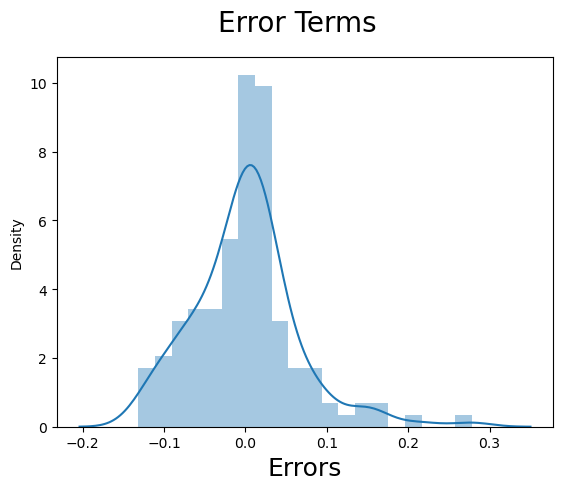

In [63]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

Text(0, 0.5, 'y_train_price')

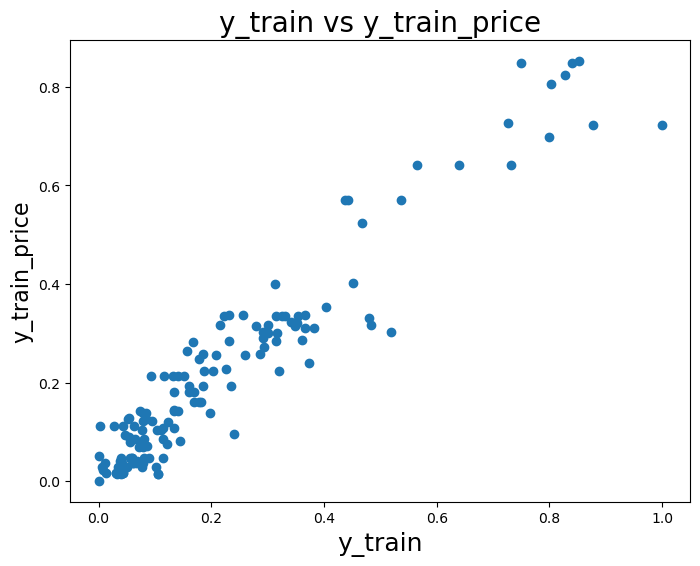

In [64]:
# Plotting y_train and y_train_price to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_train_price)
plt.title('y_train vs y_train_price', fontsize=20)          
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_price', fontsize=16)                          

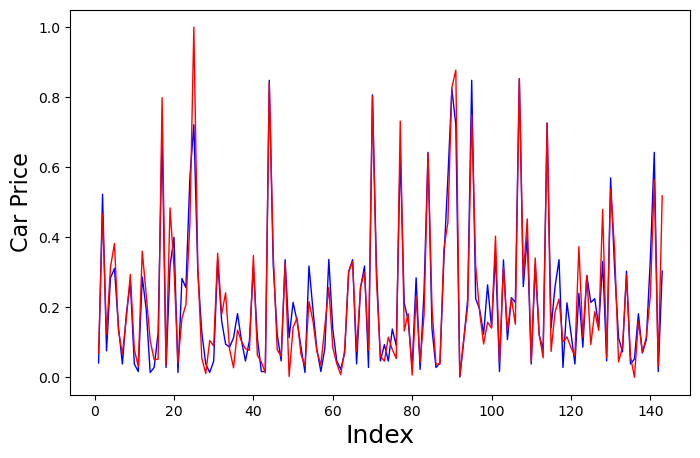

In [65]:
# Actual vs Predicted for TRAIN SET

plt.figure(figsize = (8,5))
c = [i for i in range(1,144,1)]
d = [i for i in range(1,144,1)]
plt.plot(c, y_train_price, color="blue", linewidth=1, linestyle="-") 
plt.plot(d, y_train, color="red",  linewidth=1, linestyle="-") 
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Car Price', fontsize=16)  
plt.show()

Text(0, 0.5, 'ytest-ypred')

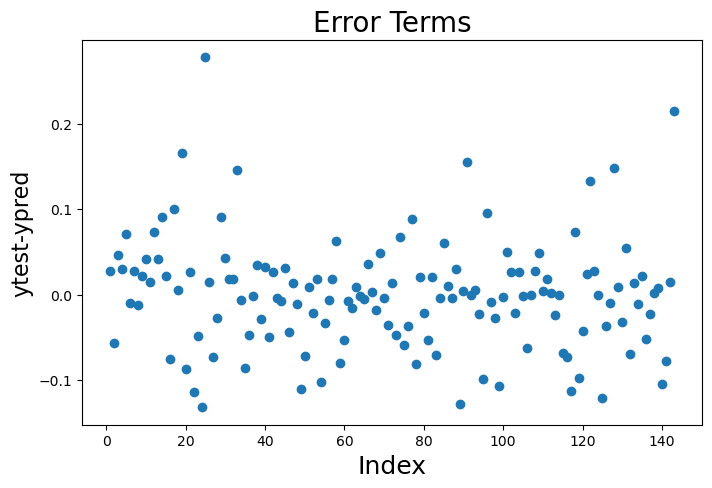

In [66]:
# Error terms for TRAIN SET
plt.figure(figsize = (8,5))
c = [i for i in range(1,144,1)]
plt.scatter(c,y_train-y_train_price)

plt.title('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)

# Making Predictions

In [67]:
# Perform scaling on list of variables which are picked in train dataset
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio',
            'car_dimension','stroke','compressionratio','peakrpm','price','hc_mpg_ratio']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [68]:
# Dividing into X_test and y_test

y_test = df_test.pop('price')
X_test = df_test

In [69]:
X_train_new.drop('const', axis=1, inplace=True)

In [70]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [71]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9185128907227077

# Model Evaluation 

Text(0, 0.5, 'y_pred')

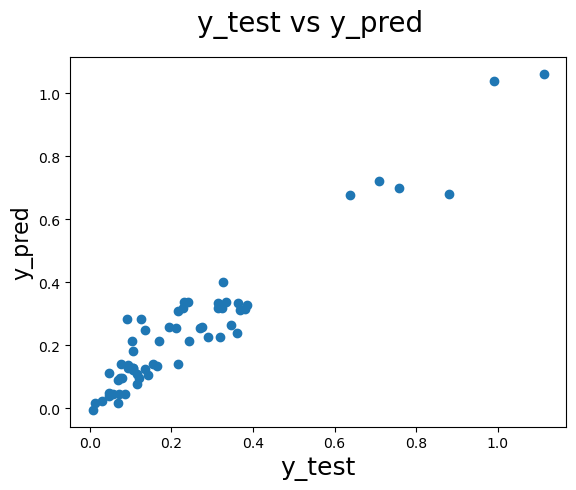

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                         

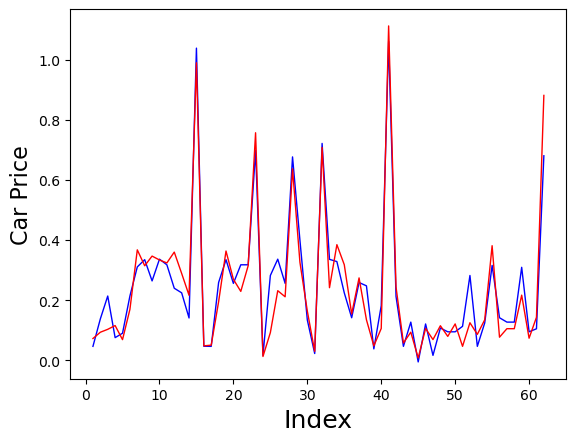

In [74]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
d = [i for i in range(1,63,1)]
plt.plot(c, y_pred, color="blue", linewidth=1, linestyle="-")     
plt.plot(d, y_test, color="red",  linewidth=1, linestyle="-")  
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Car Price', fontsize=16)  
plt.show()

Text(0, 0.5, 'ytest-ypred')

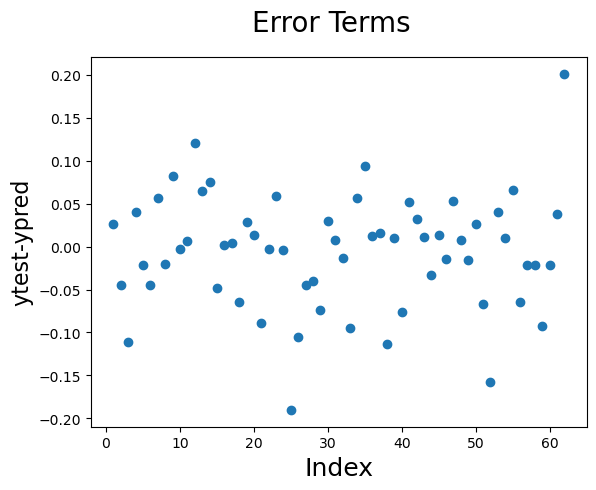

In [75]:
# Error terms

fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('ytest-ypred', fontsize=16)

In [76]:
#RMSE score for test set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.06599501615248919


In [77]:
#RMSE score for train set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_price)))

RMSE : 0.06465338795743013


In [78]:
r2_score(y_test, y_pred)

0.9185128907227077

In [79]:
r2_score(y_train, y_train_price)

0.9095095054640406